<h1>Historical sales EV in the world, we are interesting only sales BEV in : USA, France, Germany, China, India and Rest of World.</h1>

In [1]:
import pandas as pd
import config_loader
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
config = config_loader.load_config()

<h2>Show data</h2>

In [3]:
df_sales_ev = pd.read_csv(config['raw_data_path']+config['sales_ev_file_name'])
df_sales_ev

region    category                      parameter  mode powertrain  \
0     Australia  Historical                       EV stock  Cars        BEV   
1     Australia  Historical                 EV stock share  Cars         EV   
2     Australia  Historical                 EV sales share  Cars         EV   
3     Australia  Historical                       EV sales  Cars        BEV   
4     Australia  Historical                       EV sales  Cars        BEV   
...         ...         ...                            ...   ...        ...   
2771      World  Historical           Oil displacement Mbd  Cars         EV   
2772      World  Historical  Oil displacement, million lge  Cars         EV   
2773      World  Historical                       EV sales  Cars        BEV   
2774      World  Historical                 EV sales share  Cars         EV   
2775      World  Historical                 EV stock share  Cars         EV   

      year                           unit         value  
0     2011                       Vehicles  4.900000e+01  
1     2011                        percent  4.600000e-04  
2     2011                        percent  6.500000e-03  
3     2011                       Vehicles  4.900000e+01  
4     2012                       Vehicles  1.700000e+02  
...    ...                            ...           ...  
2771  2022         Milion barrels per day  4.300000e-01  
2772  2022  Oil displacement, million lge  2.500000e+04  
2773  2022                       Vehicles  7.300000e+06  
2774  2022                        percent  1.400000e+01  
2775  2022                        percent  2.100000e+00  

[2776 rows x 8 columns]

In [4]:
df_sales_ev.shape

(2776, 8)

In [5]:
df_sales_ev.head()

region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
1  Australia  Historical  EV stock share  Cars         EV  2011   percent   
2  Australia  Historical  EV sales share  Cars         EV  2011   percent   
3  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV sales  Cars        BEV  2012  Vehicles   

       value  
0   49.00000  
1    0.00046  
2    0.00650  
3   49.00000  
4  170.00000

In [6]:
df_sales_ev.describe()

year         value
count  2776.000000  2.776000e+03
mean   2016.438401  9.015623e+04
std       3.583217  6.186595e+05
min    2010.000000  1.600000e-05
25%    2013.000000  9.100000e-01
50%    2017.000000  4.000000e+02
75%    2020.000000  1.000000e+04
max    2022.000000  1.800000e+07

In [7]:
df_sales_ev.isna().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

<h2>Data is clean which great.</h2>

In [8]:
df_sales_ev.duplicated().sum()

0

In [9]:
df_sales_ev.loc[df_sales_ev.duplicated(), :]

Empty DataFrame
Columns: [region, category, parameter, mode, powertrain, year, unit, value]
Index: []

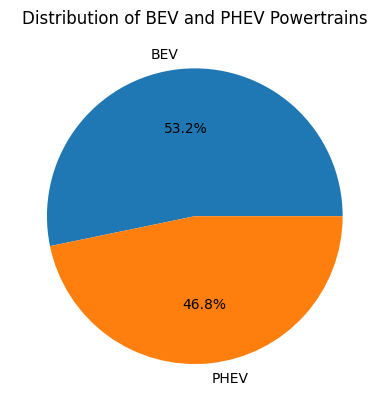

In [10]:
import matplotlib.pyplot as plt

# Assuming df_sales_ev is the DataFrame containing the "powertrain" column

# Filter the DataFrame for "bev" and "phev" powertrains
filtered_df = df_sales_ev[df_sales_ev['powertrain'].isin(['BEV', 'PHEV'])]

# Count the occurrences of each powertrain type
powertrain_counts = filtered_df['powertrain'].value_counts()

# Create a pie chart
plt.pie(powertrain_counts, labels=powertrain_counts.index, autopct='%1.1f%%')
plt.title('Distribution of BEV and PHEV Powertrains')
plt.show()

The BEV represent 53% of vehicle sales.

<h2>Show total sales BEV each year for countries : USA, France, Germany, China, India and Rest of World.</h2>

In [11]:
selected_regions = ['USA', 'France', 'Germany','United Kingdom','South Africa', 'Brazil','China', 'India', 'Rest of the world']
ev_sales_bev = df_sales_ev[ (df_sales_ev['parameter'] == 'EV sales') & (df_sales_ev['powertrain'] == 'BEV')].loc[:, ['region', 'category', 'mode', 'powertrain', 'value', 'year']].drop_duplicates()
ev_sales_bev

region    category  mode powertrain      value  year
3     Australia  Historical  Cars        BEV       49.0  2011
4     Australia  Historical  Cars        BEV      170.0  2012
15    Australia  Historical  Cars        BEV      190.0  2013
16    Australia  Historical  Cars        BEV      370.0  2014
27    Australia  Historical  Cars        BEV      760.0  2015
...         ...         ...   ...        ...        ...   ...
2739      World  Historical  Cars        BEV  1400000.0  2018
2740      World  Historical  Cars        BEV  1500000.0  2019
2754      World  Historical  Cars        BEV  2000000.0  2020
2760      World  Historical  Cars        BEV  4600000.0  2021
2773      World  Historical  Cars        BEV  7300000.0  2022

[443 rows x 6 columns]

In [12]:
filtered_selected_regions = ev_sales_bev[ev_sales_bev['region'].isin(selected_regions)]
filtered_selected_regions

region    category  mode powertrain     value  year
213   Brazil  Historical  Cars        BEV      74.0  2012
218   Brazil  Historical  Cars        BEV     130.0  2013
219   Brazil  Historical  Cars        BEV      61.0  2014
227   Brazil  Historical  Cars        BEV      59.0  2015
230   Brazil  Historical  Cars        BEV     130.0  2016
...      ...         ...   ...        ...       ...   ...
2620     USA  Historical  Cars        BEV  240000.0  2018
2626     USA  Historical  Cars        BEV  240000.0  2019
2636     USA  Historical  Cars        BEV  230000.0  2020
2645     USA  Historical  Cars        BEV  470000.0  2021
2654     USA  Historical  Cars        BEV  800000.0  2022

[111 rows x 6 columns]

<h2>List values for each countries</h2>

In [13]:

country_list_values = filtered_selected_regions.groupby('region')['value'].agg(list)

In [14]:
country_list_values

region
Brazil               [74.0, 130.0, 61.0, 59.0, 130.0, 25.0, 66.0, 5...
China                [1100.0, 4800.0, 9600.0, 15000.0, 49000.0, 150...
France               [190.0, 2600.0, 5700.0, 8800.0, 11000.0, 17000...
Germany              [140.0, 1400.0, 2200.0, 5200.0, 9100.0, 12000....
India                [450.0, 1400.0, 190.0, 410.0, 1000.0, 450.0, 7...
Rest of the world    [42.0, 280.0, 140.0, 120.0, 3300.0, 890.0, 170...
South Africa         [34.0, 14.0, 120.0, 100.0, 68.0, 66.0, 160.0, ...
USA                  [1200.0, 9800.0, 15000.0, 48000.0, 63000.0, 71...
United Kingdom       [240.0, 1200.0, 1600.0, 2600.0, 6700.0, 10000....
Name: value, dtype: object

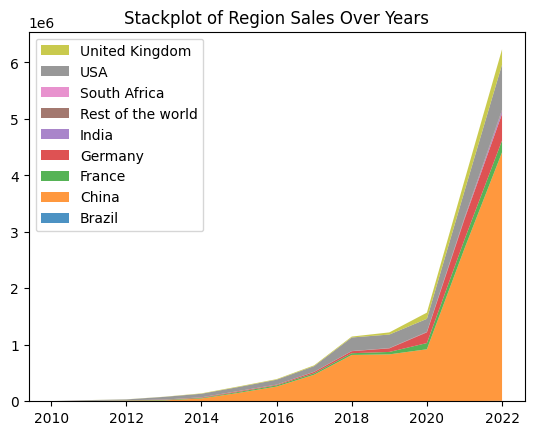

In [15]:
fig, ax = plt.subplots()
region_years = filtered_selected_regions.pivot(index='year', columns='region', values='value').fillna(0)
ax.stackplot(region_years.index, region_years.T, labels=region_years.columns, alpha=0.8)
ax.legend(loc='upper left', reverse=True)
ax.set_title('Stackplot of Region Sales Over Years')
plt.show()

<h2>Calculate sum values for each region</h2>

In [16]:
sum_per_region = filtered_selected_regions.groupby('region')['value'].sum()
sum_per_region

region
Brazil                  13165.0
China                10629500.0
France                 646290.0
Germany               1185040.0
India                   70250.0
Rest of the world       56772.0
South Africa             1374.0
USA                   2375000.0
United Kingdom         670340.0
Name: value, dtype: float64

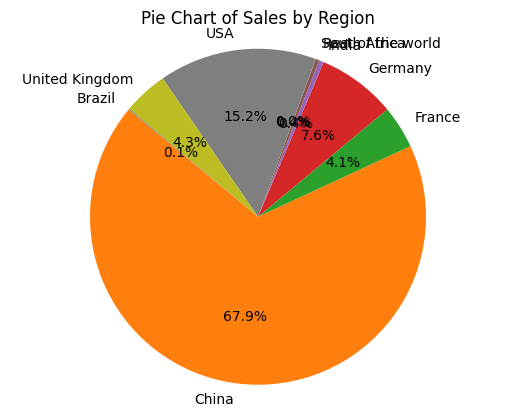

In [17]:
fig, ax = plt.subplots()
ax.pie(sum_per_region, labels=sum_per_region.index, autopct='%1.1f%%', startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Pie Chart of Sales by Region')
plt.show()

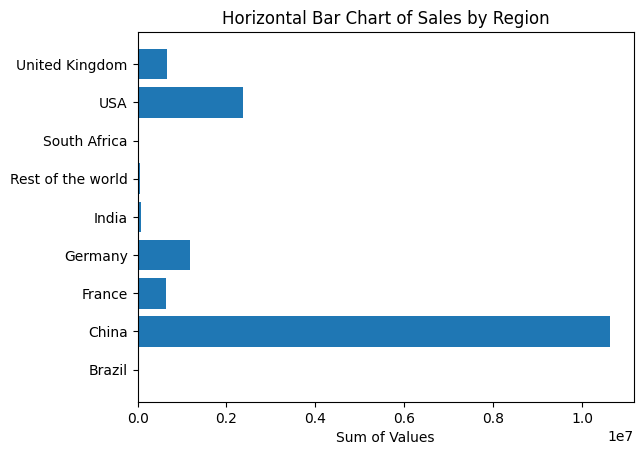

In [18]:
fig, ax = plt.subplots()
ax.barh(sum_per_region.index, sum_per_region)
ax.set_xlabel('Sum of Values')
ax.set_title('Horizontal Bar Chart of Sales by Region')
plt.show()

Clearly China dominate market sales BEV

<Axes: xlabel='year', ylabel='value'>

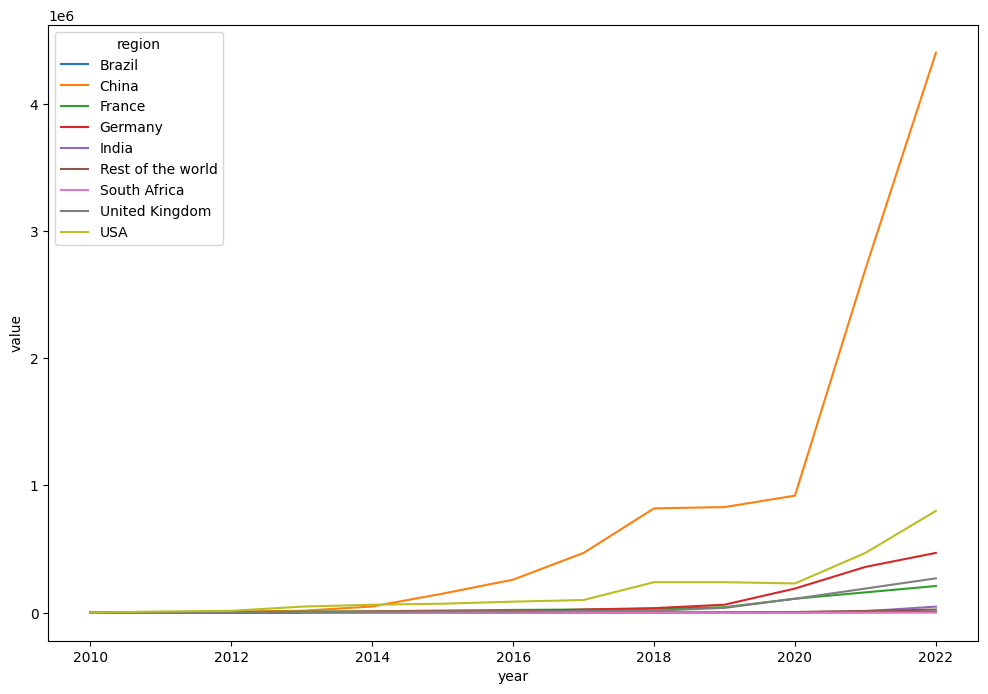

In [19]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=filtered_selected_regions, x='year', y='value', hue='region')

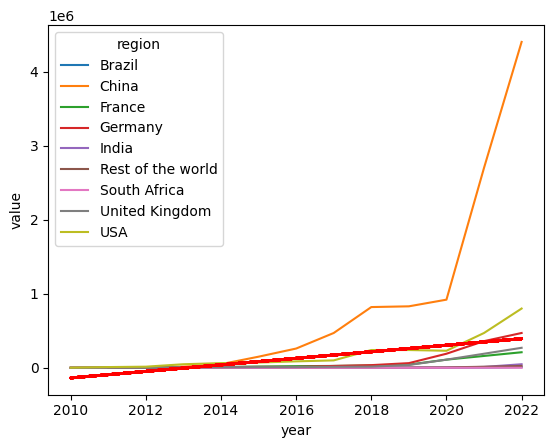

In [20]:
# Prediction EV sales with regression line
sns.lineplot(data=filtered_selected_regions, x='year', y='value', hue='region')

# Prepare the data for linear regression
X = filtered_selected_regions[['year']]  # Feature: year
y = filtered_selected_regions['value']  # Target variable: value (sales)

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Plot the linear regression line
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), color='red', linewidth=2)  # Add the linear regression line to the plot

plt.show()

<h1>The EV will increase slowly in market sales cars in the world and China will dominate market in EV.</h1>